In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Load the dataset

df = pd.read_csv("House_Price_DataSet.csv")

print(df.head())

           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810635  42491                   4                 2.50         2920   
1  6762810998  42491                   5                 2.75         2910   
2  6762812605  42491                   4                 2.50         3310   
3  6762812919  42491                   3                 2.00         2710   
4  6762813105  42491                   3                 2.50         2600   

   lot area  number of floors  waterfront present  number of views  \
0      4000               1.5                   0                0   
1      9480               1.5                   0                0   
2     42998               2.0                   0                0   
3      4500               1.5                   0                0   
4      4750               1.0                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

In [3]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)  # Fill missing values with the mean

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [4]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)  # Fill missing values with the mean

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [5]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], origin='1899-12-30', unit='D')

# Extract year and month from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [6]:
# One-hot encode categorical variables (if any)
df = pd.get_dummies(df, columns=['condition of the house', 'grade of the house'], drop_first=True)

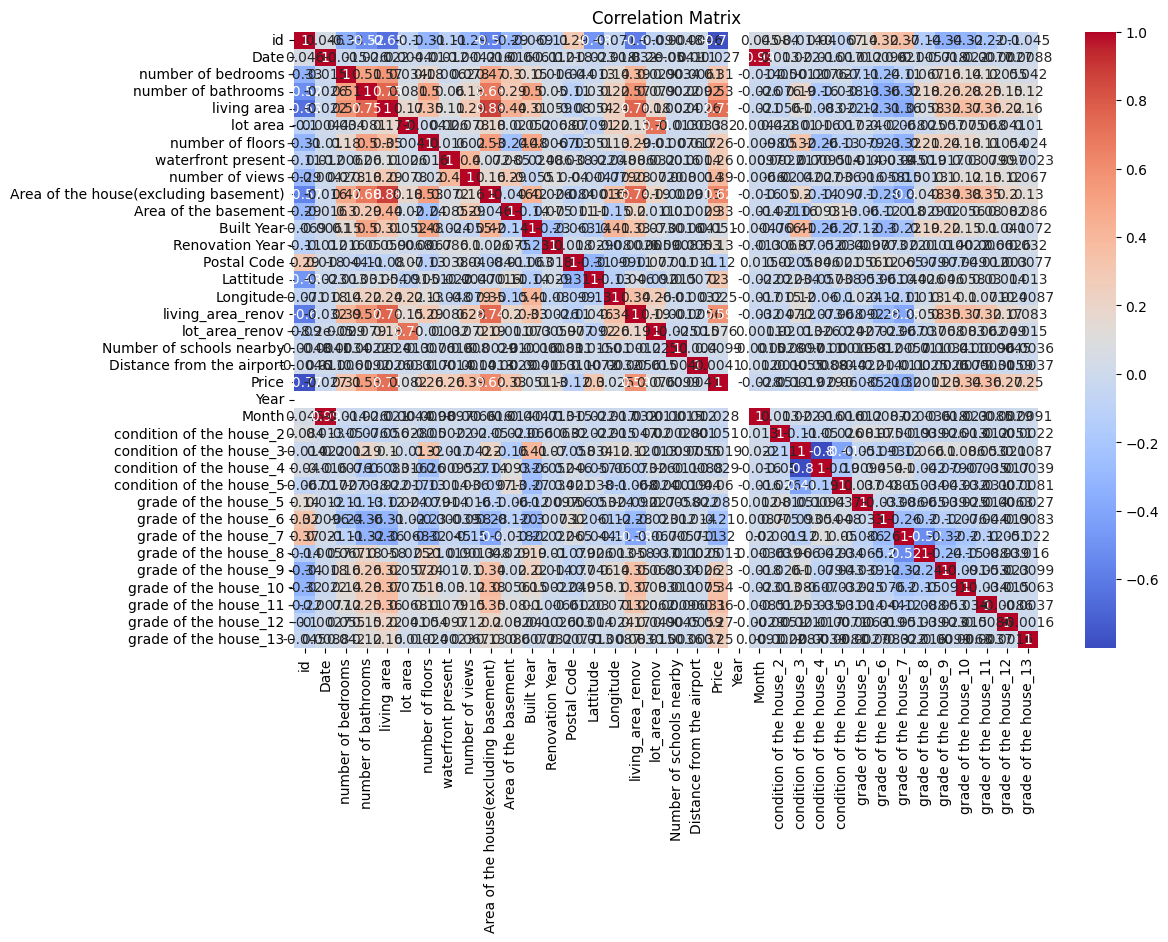

In [7]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

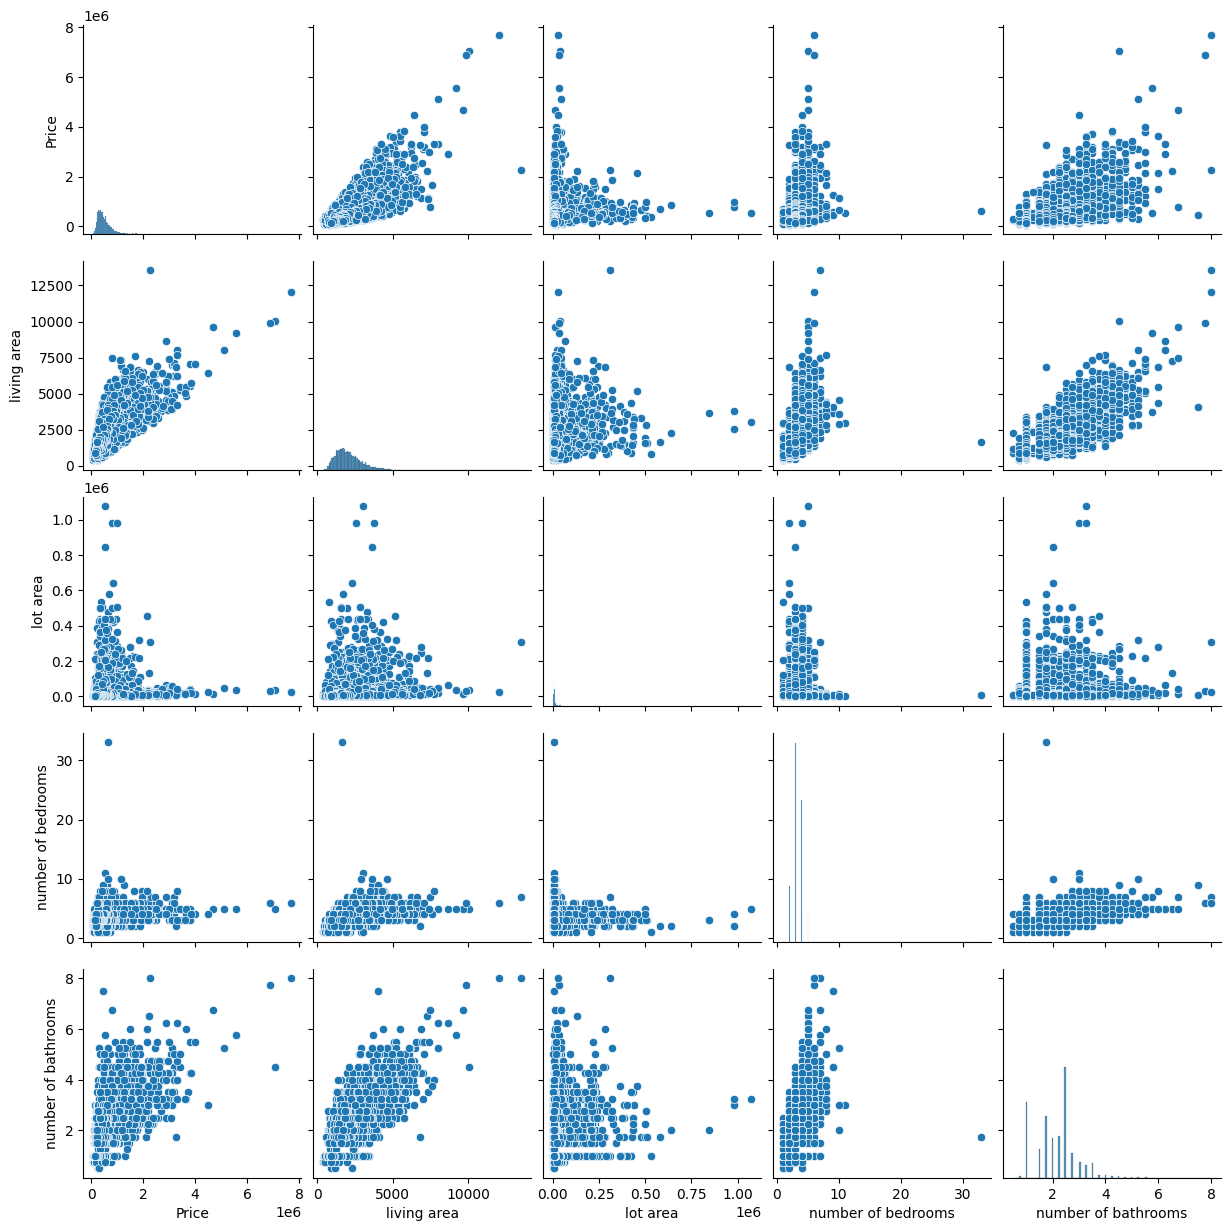

In [8]:
# Pairplot for selected features
sns.pairplot(df[['Price', 'living area', 'lot area', 'number of bedrooms', 'number of bathrooms']])
plt.show()

In [9]:
# Select relevant features
# features = ['number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 
#             'waterfront present', 'number of views', 'Area of the house(excluding basement)', 
#             'Area of the basement', 'Built Year', 'Renovation Year', 'Number of schools nearby', 
#             'Distance from the airport', 'Year', 'Month']
features = ['number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 
            'waterfront present', 'number of views', 'Area of the house(excluding basement)', 
            'Area of the basement', 'Built Year', 'Renovation Year', 'Number of schools nearby', 
            'Distance from the airport', 'Month','Year']
# features=['number of bedrooms','number of bathrooms','number of floors','living area','Distance from the airport','Number of schools nearby']
X = df[features]
y = df['Price']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Number of schools nearby,Distance from the airport,Month,Year
2996,3,1.75,1670,6900,1.0,0,0,1170,500,1978,0,3,56,6,2016
1369,3,1.75,1620,7540,1.0,0,0,1310,310,1988,0,1,70,5,2016
740,3,2.50,1780,7214,1.0,0,0,1400,380,1986,0,1,55,5,2016
9527,3,2.00,1850,9550,1.0,0,0,1850,0,1988,0,1,70,9,2016
10324,3,1.50,1420,8580,1.0,0,0,1420,0,1962,0,2,50,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,4,2.50,2170,7275,1.0,0,0,1820,350,1978,0,3,53,7,2016
13418,3,2.50,1740,10050,2.0,0,0,1740,0,1989,0,2,78,12,2016
5390,5,3.50,2720,11454,2.0,0,0,1830,890,1988,0,2,78,7,2016
860,3,2.00,1450,2400,1.5,0,0,1450,0,1900,2003,1,66,5,2016


In [21]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


array([[-0.40091124, -0.49430286, -0.46346497, ..., -1.00542464,
        -1.01396346,  0.        ],
       [-0.40091124, -0.49430286, -0.51767124, ...,  0.56505978,
        -1.46806098,  0.        ],
       [-0.40091124,  0.4800014 , -0.34421117, ..., -1.1176021 ,
        -1.46806098,  0.        ],
       ...,
       [ 1.70824619,  1.77907375,  0.67486675, ...,  1.46247945,
        -0.55986594,  0.        ],
       [-0.40091124, -0.16953477, -0.70197257, ...,  0.11634994,
        -1.46806098,  0.        ],
       [-0.40091124,  0.4800014 , -0.63800917, ..., -1.45413448,
        -0.10576842,  0.        ]])

In [12]:
# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)



In [14]:
mse_lr = mean_squared_error(y_test, y_pred_lr)

mae_lr = mean_absolute_error(y_test, y_pred_lr)

r2_lr = r2_score(y_test, y_pred_lr)


print(f'Linear Model - MSE: {mse_lr}, MAE: {mae_lr}, R2: {r2_lr}')

Linear Model - MSE: 55224612161.007164, MAE: 150148.84326409607, R2: 0.6268508240279809


In [15]:
# Train a Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)



Random Forest Regression - MSE: 48019155906.09253, R2: 0.6755376315728651


In [16]:
mse_rf = mean_squared_error(y_test, y_pred_rf)

mae_rf = mean_absolute_error(y_test, y_pred_rf)

r2_rf = r2_score(y_test, y_pred_rf)


print(f'Random Forest Model - MSE: {mse_rf}, MAE: {mae_rf}, R2: {r2_rf}')

Random Forest Model - MSE: 48019155906.09253, MAE: 138248.45357729137, R2: 0.6755376315728651


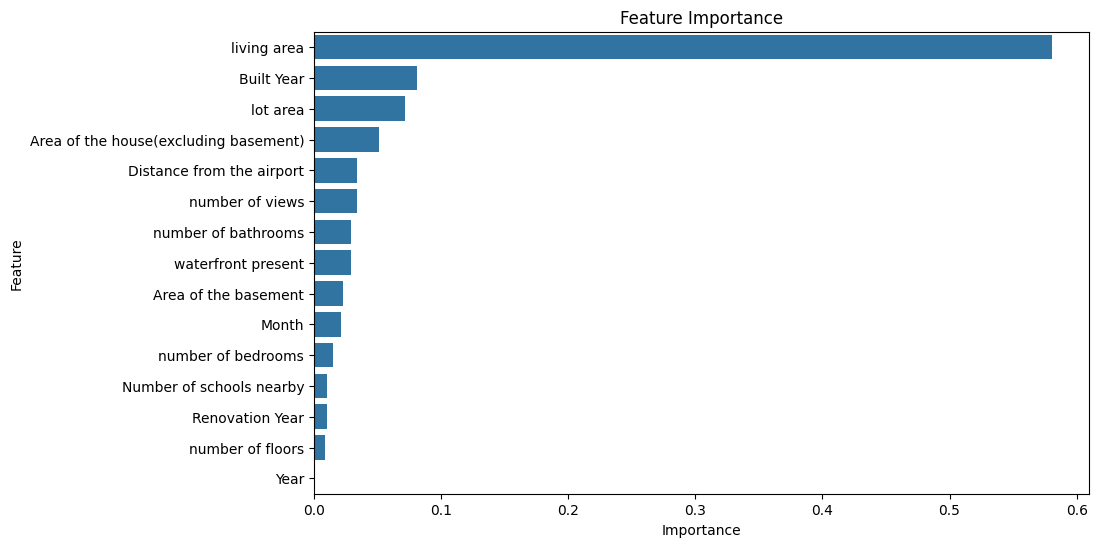

In [17]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [22]:
# Calculate R² score for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
accuracy_lr = r2_lr * 100  # Convert to percentage
print(f'Linear Regression Accuracy: {accuracy_lr:.2f}%')

# Calculate R² score for Random Forest Regression
r2_rf = r2_score(y_test, y_pred_rf)
accuracy_rf = r2_rf * 100  # Convert to percentage
print(f'Random Forest Regression Accuracy: {accuracy_rf:.2f}%')

Linear Regression Accuracy: 62.69%
Random Forest Regression Accuracy: 67.55%


In [ ]:
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
estimators = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42))
]

stack = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stack.fit(X_train, y_train)

y_pred_stack = stack.predict(X_test)


In [22]:
mse_stack = mean_squared_error(y_test, y_pred_stack)

mae_stack = mean_absolute_error(y_test, y_pred_stack)

r2_stack = r2_score(y_test, y_pred_stack)


print(f'Stacking Model - MSE: {mse_stack}, MAE: {mae_stack}, R2: {r2_stack}')

Stacking Model - MSE: 46618048021.49596, MAE: 136390.80163427177, R2: 0.6850048280297786


In [21]:
import joblib


# joblib.dump(rf, 'house_price_rf_model.pkl')


# joblib.dump(scaler, 'scaler.pkl')

joblib.dump(stack,'house_price_stack_model.pkl')

['house_price_stack_model.pkl']

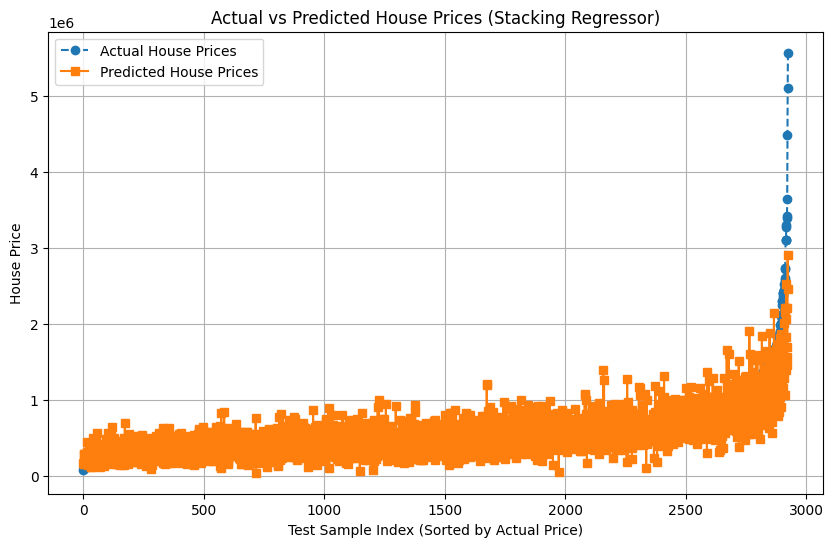

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort values for better visualization
sorted_indices = np.argsort(y_test)  # Sorting indices based on actual values
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_sorted = np.array(y_pred_lr)[sorted_indices]

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))

plt.plot(y_test_sorted, label="Actual House Prices", marker='o', linestyle='dashed')
plt.plot(y_pred_sorted, label="Predicted House Prices", marker='s', linestyle='solid')

plt.xlabel("Test Sample Index (Sorted by Actual Price)")
plt.ylabel("House Price")
plt.title("Actual vs Predicted House Prices (Stacking Regressor)")
plt.legend()
plt.grid(True)

plt.show()



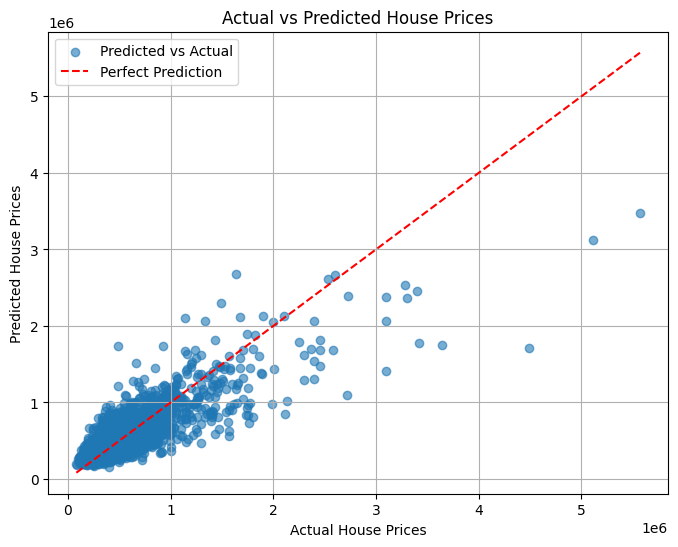

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred_stack, alpha=0.6, label="Predicted vs Actual")

# Plot y = x line (Perfect Prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Prediction")

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)

plt.show()
